In [83]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [84]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [85]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [86]:
type(df)

pandas.core.frame.DataFrame

In [87]:
df.describe(include='all')

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811.000000,545550.000000,577462
unique,3239,NaN,NaN,243
top,1996-12-01,NaN,NaN,Slovakia
freq,243,NaN,NaN,3239
mean,NaN,17.193354,1.019057,NaN
std,NaN,10.953966,1.201930,NaN
min,NaN,-37.658000,0.052000,NaN
25%,NaN,10.025000,0.323000,NaN
50%,NaN,20.901000,0.571000,NaN
75%,NaN,25.814000,1.206000,NaN


In [88]:
df_country = df.Country.unique()

In [89]:
len(df_country)

243

In [97]:
df_Iran = df.drop('AverageTemperatureUncertainty', axis=1)
df_Iran = df_Iran[df_Iran.Country == "Iran"]

In [98]:
len(df_Iran)

2120

In [99]:
df_Iran = df_Iran.drop('Country',axis=1)

In [100]:
df_Iran.head(10)

,dt,AverageTemperature
248573,1837-02-01,6.965
248574,1837-03-01,11.100
248575,1837-04-01,16.112
248576,1837-05-01,21.845
248577,1837-06-01,26.454
248578,1837-07-01,28.477
248579,1837-08-01,27.234
248580,1837-09-01,23.815
248581,1837-10-01,16.054
248582,1837-11-01,10.758


In [101]:
df_Iran.index = pd.to_datetime(df_Iran.dt)

In [102]:
df_Iran.head(10)

,dt,AverageTemperature
dt,,
1837-02-01,1837-02-01,6.965
1837-03-01,1837-03-01,11.100
1837-04-01,1837-04-01,16.112
1837-05-01,1837-05-01,21.845
1837-06-01,1837-06-01,26.454
1837-07-01,1837-07-01,28.477
1837-08-01,1837-08-01,27.234
1837-09-01,1837-09-01,23.815
1837-10-01,1837-10-01,16.054


In [103]:
df_Iran = df_Iran.drop('dt', axis=1)

In [104]:
df_Iran.head(10)

,AverageTemperature
dt,
1837-02-01,6.965
1837-03-01,11.100
1837-04-01,16.112
1837-05-01,21.845
1837-06-01,26.454
1837-07-01,28.477
1837-08-01,27.234
1837-09-01,23.815
1837-10-01,16.054


In [105]:
# Filtering data starting from 1970-01-01
df_Iran = df_Iran.loc['1970-01-01':]

In [106]:
df_Iran.head(10)

,AverageTemperature
dt,
1970-01-01,5.687
1970-02-01,9.770
1970-03-01,12.548
1970-04-01,19.276
1970-05-01,24.007
1970-06-01,27.907
1970-07-01,29.263
1970-08-01,29.368
1970-09-01,23.984


In [107]:
# Testing whether there are null values
len(df_Iran[df_Iran.isnull()])

525

In [108]:
df_Iran = df_Iran.sort_index()

In [109]:
df_Iran.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [110]:
# Impute missing (NaN) values with the previous effective data
df_Iran.AverageTemperature.fillna(method='pad', inplace=True)

In [111]:
df_Iran[df_Iran.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [112]:
df_Iran.describe(include='all')

,AverageTemperature
count,525.000000
mean,18.390992
std,8.635563
min,1.113000
25%,10.416000
50%,18.741000
75%,26.734000
max,31.651000


In [113]:
df_Iran['Ticks'] = range(0,len(df_Iran.index.values))

In [114]:
df_Iran.head(10)

,AverageTemperature,Ticks
dt,,
1970-01-01,5.687,0
1970-02-01,9.770,1
1970-03-01,12.548,2
1970-04-01,19.276,3
1970-05-01,24.007,4
1970-06-01,27.907,5
1970-07-01,29.263,6
1970-08-01,29.368,7
1970-09-01,23.984,8


In [115]:
df_Iran.tail(10)

,AverageTemperature,Ticks
dt,,
2012-12-01,8.295,515
2013-01-01,7.669,516
2013-02-01,9.867,517
2013-03-01,13.960,518
2013-04-01,18.416,519
2013-05-01,24.123,520
2013-06-01,29.361,521
2013-07-01,31.459,522
2013-08-01,29.473,523


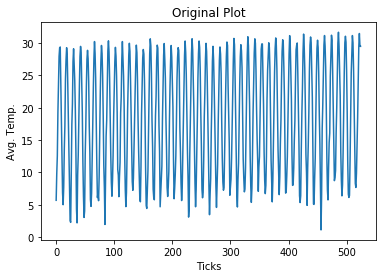

In [116]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_Iran);

In [134]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.savefig('rolling_mean.png')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ", type(df_test))
    print("df_test: ", df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n", df_output)
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

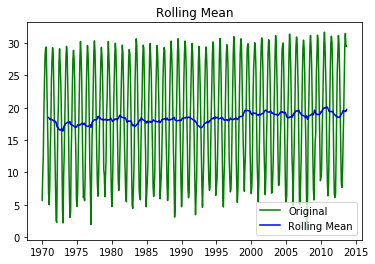

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-2.344876026976033, 0.15790259435882065, 14, 510, {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}, 1655.5650041079282)
df_output: 
 Test Statistic                  -2.344876
p-value                          0.157903
#Lags Used                      14.000000
Number of Observations Used    510.000000
dtype: float64
Test Statistic                  -2.344876
p-value                          0.157903
#Lags Used                      14.000000
Number of Observations Used    510.000000
Critical Value (1%)             -3.443237
Critical Value (5%)             -2.867224
Critical Value (10%)            -2.569797
dtype: float64


In [135]:
stationarity_check(df_Iran.AverageTemperature)

In [119]:
df_Iran['Roll_Mean'] = df_Iran.AverageTemperature.rolling(12).mean()

In [120]:
df_Iran.head(20)

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1970-01-01,5.687,0,NaN
1970-02-01,9.770,1,NaN
1970-03-01,12.548,2,NaN
1970-04-01,19.276,3,NaN
1970-05-01,24.007,4,NaN
1970-06-01,27.907,5,NaN
1970-07-01,29.263,6,NaN
1970-08-01,29.368,7,NaN
1970-09-01,23.984,8,NaN


In [63]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


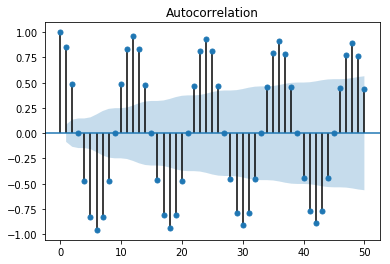

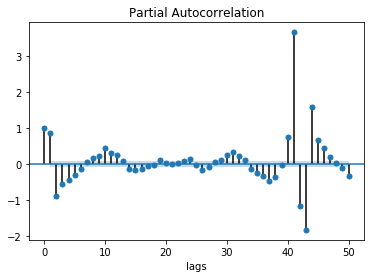

In [121]:
plot_acf(df_Iran.AverageTemperature, lags=50)
plot_pacf(df_Iran.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

In [122]:
from statsmodels.tsa.arima_model import ARMA

In [123]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_Iran.AverageTemperature, order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 0) - AIC:3756.5679076592724
ARMA(0, 1) - AIC:3198.7393204003574
ARMA(0, 3) - AIC:2666.0125056444185
ARMA(1, 0) - AIC:3067.8524458445663


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 1) - AIC:2747.755197553911


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 2) - AIC:2613.5355142176295


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 3) - AIC:2860.4039394941956


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 0) - AIC:2259.988949614672


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % fr

ARMA(2, 2) - AIC:1833.1152457161331
ARMA(3, 0) - AIC:2099.241608947711


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 2) - AIC:1810.6495560944036


C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


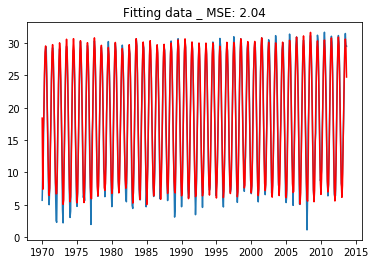

In [127]:
model = ARMA(df_Iran.AverageTemperature, order=(3,2))  
results_MA = model.fit()  
plt.plot(df_Iran.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_Iran.AverageTemperature)**2).mean()))
plt.show()

In [128]:
predictions = results_MA.predict('01/01/1970', '12/01/2023')

C:\Users\DiakoSystem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [129]:
predictions

1970-01-01    18.383905
1970-02-01     7.389830
1970-03-01    16.163434
1970-04-01    19.225585
1970-05-01    25.239612
1970-06-01    28.534438
1970-07-01    29.534611
1970-08-01    27.644096
1970-09-01    24.215085
1970-10-01    18.156030
1970-11-01    12.734667
1970-12-01     9.115864
1971-01-01     6.441068
1971-02-01     7.582104
1971-03-01    12.110549
1971-04-01    18.631913
1971-05-01    23.789214
1971-06-01    28.578645
1971-07-01    29.739020
1971-08-01    28.221736
1971-09-01    24.148178
1971-10-01    18.156214
1971-11-01    12.347339
1971-12-01     8.469942
1972-01-01     6.694179
1972-02-01     6.724154
1972-03-01     9.868571
1972-04-01    16.859855
1972-05-01    23.559150
1972-06-01    27.386242
                ...    
2021-07-01    30.384519
2021-08-01    29.151899
2021-09-01    25.031025
2021-10-01    19.127221
2021-11-01    13.024040
2021-12-01     8.358515
2022-01-01     6.382058
2022-02-01     7.624807
2022-03-01    11.753425
2022-04-01    17.660509
2022-05-01    23